# DBSCAN Clustering

Density-based spatial clustering of applications with noise (DBSCAN) is a well-known data clustering algorithm that is commonly used in data mining and machine learning.

Based on a set of points (let’s think in a bidimensional space as exemplified in the figure), DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import datasets
import numpy as np

Generate sample dataset

In [5]:
x,y = datasets.make_moons(n_samples=2500, noise= 0.05)

x1 = x[:,0]
x2 = x[:,1]

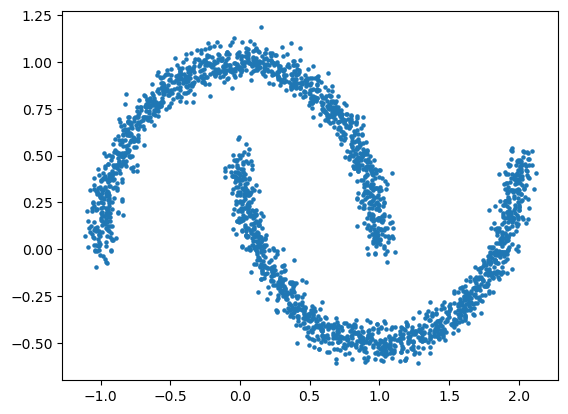

In [6]:
plt.scatter(x1,x2,s=5)
plt.show()

Finding optimum value

In [7]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

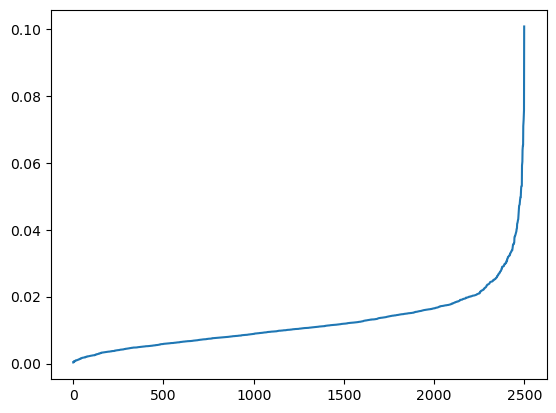

In [8]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Train with DBSCAN

In [9]:
model = DBSCAN(eps = 0.050)
model.fit(x)
y_pred = model.labels_.astype(np.int)

/var/folders/98/pgyvqp115_q7lctf5vvv65gr0000gp/T/ipykernel_8187/2476604678.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = model.labels_.astype(np.int)


Visualize clusters

Clusters:



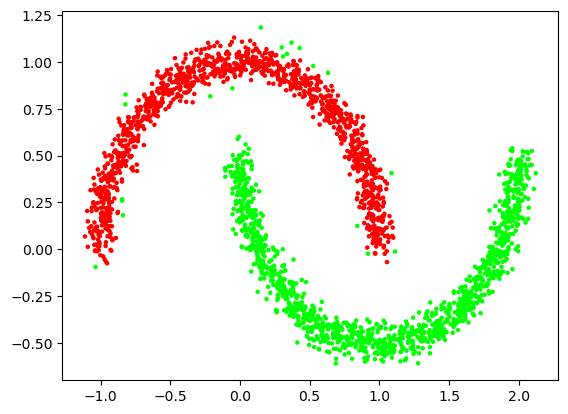

In [10]:
colors = np.array(['#ff0000','#00ff00'])
print("Clusters:\n")
plt.scatter(x1,x2,s=5,color = colors [y_pred])
plt.show()